In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from RNN import RNN
from matplotlib import pyplot as plt

In [2]:
model = RNN()

## Read In Data

In [3]:
path1 = "data/db0_to_39_window_data.csv"
path2 = "data/arjun_window_data.csv"

data1 = model.clean_data(path1)
data2 = model.clean_data(path2)

c:\Users\Andrew Chin\DSC180A\temp_intel_repo\notebooks\RNN\RNN.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tvalue'] = data.time
c:\Users\Andrew Chin\DSC180A\temp_intel_repo\notebooks\RNN\RNN.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['delta'] = (data['tvalue'] - data['tvalue'].shift()).fillna(pd.Timedelta(seconds=0))
c:\Users\Andrew Chin\DSC180A\temp_intel_repo\notebooks\RNN\RNN.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [4]:
seconds = model.to_seconds(data1.time_spent)
minutes = model.to_minutes(data1.time_spent)

In [5]:
data1['seconds'] = seconds

# User1 (Andrew Data)

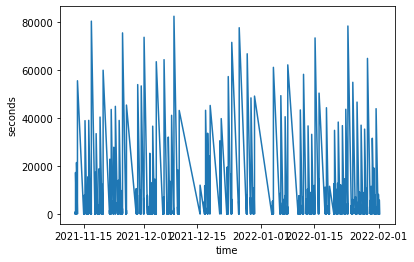

In [6]:
sns.lineplot(x='time', y='seconds', data=data1)

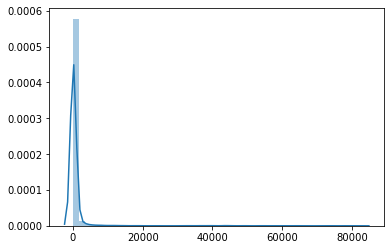

In [7]:
sns.distplot(seconds)

In [8]:
three_sigma = 3*(np.std(data1.seconds))
less_data1 = data1[data1.seconds < three_sigma ]

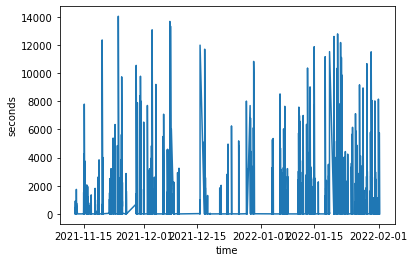

In [9]:
sns.lineplot(x='time', y='seconds', data=less_data1)

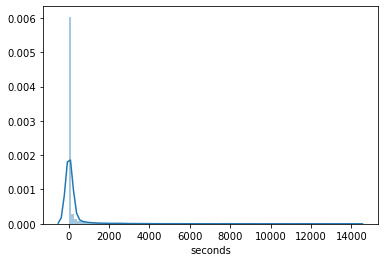

In [10]:
sns.distplot(less_data1.seconds, bins=100)

In [11]:
three_sigma

14358.052153646533

# User2 Arjun Data

In [12]:
data2

,time,window,time_spent
0,2021-12-15 10:17:56.270,cmd.exe,00:00:05.050000
1,2021-12-15 10:18:01.320,explorer.exe,00:00:05.042000
2,2021-12-15 10:18:06.362,chrome.exe,00:02:15.147000
5,2021-12-15 10:20:21.509,explorer.exe,00:00:24.220000
6,2021-12-15 10:20:45.729,chrome.exe,00:02:26.282000
...,...,...,...
5010,2022-01-26 05:17:10.077,chrome.exe,00:00:02.022000
5011,2022-01-26 05:17:12.099,explorer.exe,00:00:01.015000
5012,2022-01-26 05:17:13.114,chrome.exe,00:00:04.055000
5013,2022-01-26 05:17:17.169,explorer.exe,00:00:04.050000


In [13]:
seconds2 = model.to_seconds(data2.time_spent)
minutes2 = model.to_minutes(data2.time_spent)

data2['seconds'] = seconds2

In [14]:
three_sigma2 = 3*(np.std(data2.seconds))
less_10k_user2 = data2[data2.seconds < three_sigma2]

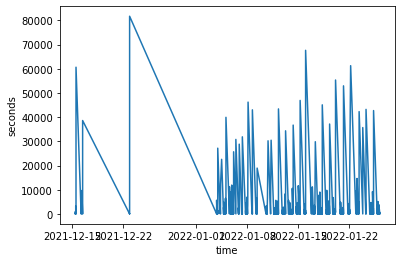

In [15]:
sns.lineplot(x='time', y='seconds', data=data2)

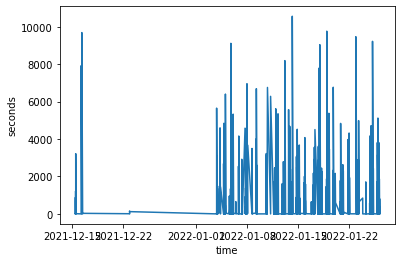

In [16]:
sns.lineplot(x='time', y='seconds', data=less_10k_user2)

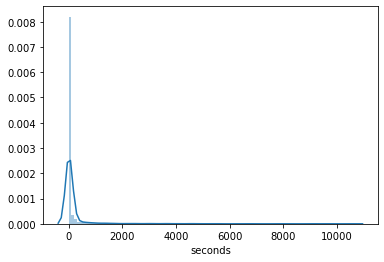

In [17]:
sns.distplot(less_10k_user2.seconds,bins=100)

## RNN.py testing

In [18]:
def drop_dups(df):
    bool_indexer = [True] * len(df)
    for i in range(len(df) - 1): #-1 to avoid IndexOutOfBoundsError
        curr_win = df.iloc[i].window
        next_win = df.iloc[i+1].window
        #if the next window is the same then add index to indeces to drop list
        if curr_win == next_win:
            bool_indexer[i+1] = False
    return df[bool_indexer]

In [19]:
def clean_data(path):
    df = pd.read_csv(path)
    #if path refers to a window csv
    if df.VALUE.dtype == 'object':
        #drop unecessary cols and rename the remaining cols
        df = df.drop(['ID_INPUT','PRIVATE_DATA'], axis = 1)
        df.columns = ['time','window']

        #change time col to datetime object
        df['time'] = pd.to_datetime(df['time'])

        #handle back-to-back same windows
        clean_df = drop_dups(df)
    return clean_df
    

In [20]:
#convert days spent on window to minutes spent on window
def convert_time(time):
    return round(float((time.total_seconds()/60)), 2)

In [21]:
#Extract time(in min) spent within each app
#returns pd.Series with time spent on window 
#last window will have 0 time spent
def calc_time(data):
    
    data['tvalue'] = data.time
    data['delta'] = (data['tvalue'] - data['tvalue'].shift()).fillna(pd.Timedelta(seconds=0))

    time_col = list(data['delta'][1:]) + [pd.Timedelta(seconds=0)]
    time_spent = pd.Series(time_col)
    time_spent.index = data.window
    
    return time_spent
